# **Importing** **Dataset**

In [ ]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

# Load dataset
housing = fetch_california_housing(as_frame=True)
df = housing.frame

# Show dataset info
print("Shape of dataset:", df.shape)
print("\nFirst 5 rows:\n", df.head())


Shape of dataset: (20640, 9)

First 5 rows:
    MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


In [ ]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

# Load dataset
housing = fetch_california_housing(as_frame=True)
df = housing.frame

# Save as CSV file inside Colab
df.to_csv("california_housing.csv", index=False)


# **Download Dataset**


In [ ]:
from google.colab import files
files.download("california_housing.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving california_housing.csv to california_housing (1).csv


# **Data Loading**

In [ ]:
import pandas as pd

# Read uploaded CSV
df = pd.read_csv("california_housing.csv")

# Show dataset info
print("Shape of dataset:", df.shape)
print("\nFirst 5 rows:\n", df.head())
print("\nColumns:\n", df.columns)


Shape of dataset: (20640, 9)

First 5 rows:
    MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  

Columns:
 Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')


# **Exploratory data analysis (EDA)**


--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None

--- Summary Statistics ---
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900

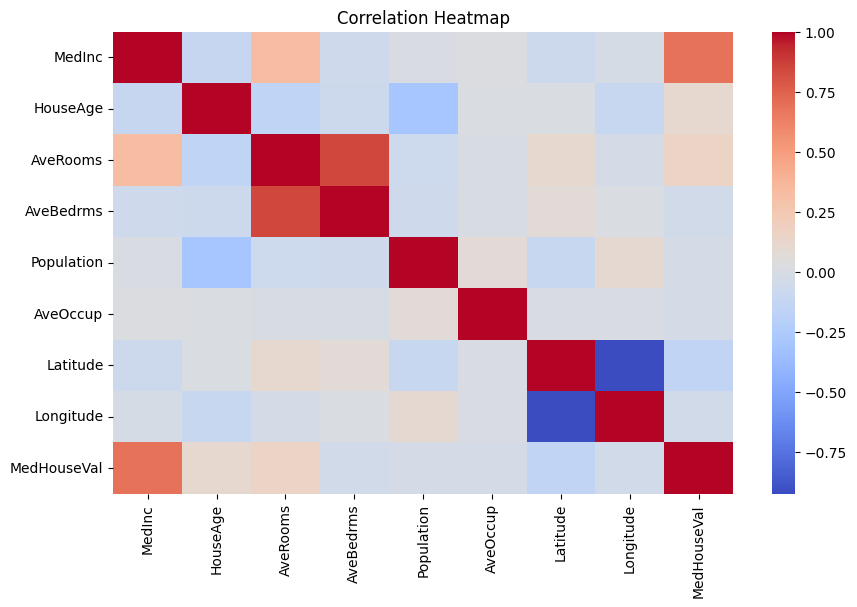

In [ ]:
# Step 2: EDA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Basic info
print("\n--- Dataset Info ---")
print(df.info())

print("\n--- Summary Statistics ---")
print(df.describe())

print("\n--- Missing Values ---")
print(df.isnull().sum())

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Pairplot (optional - may take time)
# sns.pairplot(df.sample(500))   # sample to reduce size


# **Model : Logistic Regression**

In [ ]:
# Step 3: Train a Regression Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Features (X) and Target (y)
X = df.drop("MedHouseVal", axis=1)
y = df["MedHouseVal"]

# Split dataset into Train (80%) and Test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create Linear Regression model
model = LinearRegression()

# Train model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("✅ Model Trained!")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)


✅ Model Trained!
Mean Squared Error (MSE): 0.5558915986952444
Root Mean Squared Error (RMSE): 0.7455813830127764
R² Score: 0.5757877060324508


# **Model** **Evaluation**

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Predictions
y_pred = model.predict(X_test)

# Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R² Score:", r2)



Mean Squared Error: 0.5558915986952444
Root Mean Squared Error: 0.7455813830127764
Mean Absolute Error: 0.5332001304956557
R² Score: 0.5757877060324508


# **Prediction Visualization**

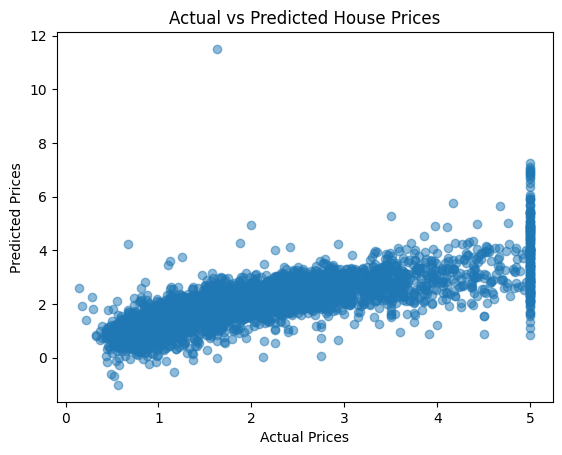

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()

# **Feature Importance**

In [ ]:
coefficients = model.coef_[0]
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
}).sort_values(by="Coefficient", ascending=False)

print(feature_importance)


      Feature  Coefficient
0      MedInc     0.448675
1    HouseAge     0.448675
2    AveRooms     0.448675
3   AveBedrms     0.448675
4  Population     0.448675
5    AveOccup     0.448675
6    Latitude     0.448675
7   Longitude     0.448675


# **Model Saving**

In [ ]:
import joblib

joblib.dump(model, "california_housing_model.pkl")
print("Model saved as california_housing_model.pkl")


Model saved as california_housing_model.pkl


# **Directory Listing**

In [ ]:
!ls


'california_housing (1).csv'   california_housing_model.pkl
 california_housing.csv        sample_data


# **Download Model**

In [ ]:
from google.colab import files
files.download("california_housing_model.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>